## How to run 

* [Run on Google Colab](https://colab.research.google.com/github/cbernet/universal_approximation/blob/master/approx.ipynb) (feel free to change the runtime type to GPU if needed)
* Or run locally: 

```
conda create -n uniapprox python=3.7
conda activate uniapprox
conda install keras matplotlib jupyter
```

## Set up the tools

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

# just to be able to run on my mac, probably not necessary on other platforms
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

## Function to be approximated: sinus

In [63]:
linx = np.linspace(-5, 5, 10001)
sinus = np.sin(linx)

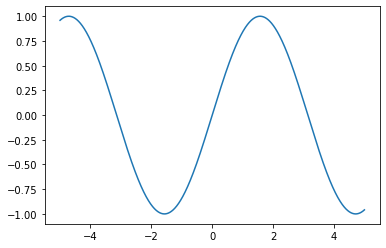

In [64]:
plt.plot(linx, sinus)

## Definition of the model 

Play with number of layers, number of neurons, ...

In [105]:
from keras import layers, models, optimizers

model = models.Sequential([
    layers.Dense(200, input_shape=(1,), activation='relu'),     
    layers.Dense(200, input_shape=(1,), activation='relu'),     
    layers.Dense(1), # no activation -> linear function of the input
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_63 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


In [106]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',
              optimizer=opt)
model.fit(linx, sinus, epochs=30, batch_size=20)

Epoch 1/30
10001/10001 [==============================] - 2s 211us/step - loss: 0.0632
Epoch 2/30
10001/10001 [==============================] - 2s 172us/step - loss: 0.0065
Epoch 3/30
10001/10001 [==============================] - 2s 175us/step - loss: 0.0038
Epoch 4/30
10001/10001 [==============================] - 2s 177us/step - loss: 0.0021
Epoch 5/30
10001/10001 [==============================] - 2s 189us/step - loss: 0.0016
Epoch 6/30
10001/10001 [==============================] - 2s 200us/step - loss: 0.0012
Epoch 7/30
10001/10001 [==============================] - 2s 204us/step - loss: 8.6548e-04
Epoch 8/30
10001/10001 [==============================] - 2s 217us/step - loss: 5.5282e-04
Epoch 9/30
10001/10001 [==============================] - 2s 203us/step - loss: 5.9357e-04
Epoch 10/30
10001/10001 [==============================] - 2s 201us/step - loss: 5.4419e-04
Epoch 11/30
10001/10001 [==============================] - 2s 199us/step - loss: 4.1628e-04
Epoch 12/30
10001/100

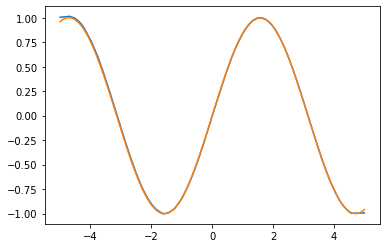

In [107]:
preds = model.predict(linx)
plt.plot(linx, preds)
plt.plot(linx, sinus)